# Data Analysis

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing, svm

In [67]:
#importing dataset and preprocessing
df=pd.read_csv("Cab_Data.csv")
df.dropna(inplace=True)
df.drop_duplicates(keep=False, inplace=True)
df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [9]:
#converting date of travel row to datetime format
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])

In [68]:
#dataset first few columns
df.head

<bound method NDFrame.head of         Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52  

In [11]:
#viewing relationships
df.corr()

<ipython-input-11-2b508a7c9fe3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Transaction ID,KM Travelled,Price Charged,Cost of Trip
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462
KM Travelled,-0.001429,1.000000,0.835753,0.981848
Price Charged,-0.052902,0.835753,1.000000,0.859812
Cost of Trip,-0.003462,0.981848,0.859812,1.000000


<Axes: xlabel='KM Travelled', ylabel='Price Charged'>

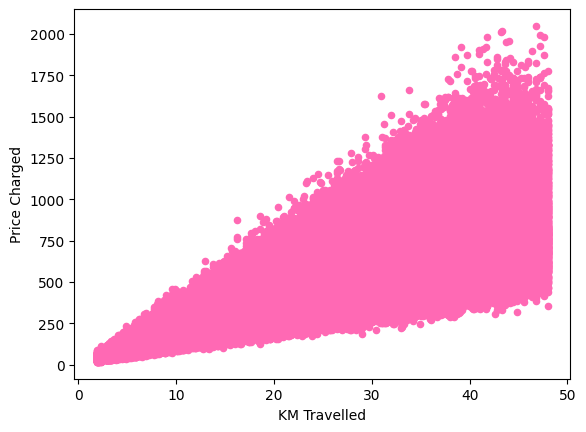

In [12]:
#visualizing relationship between km travelled and cost of trip
df.plot(kind='scatter',x="KM Travelled",y="Price Charged",color='#FF69B4')

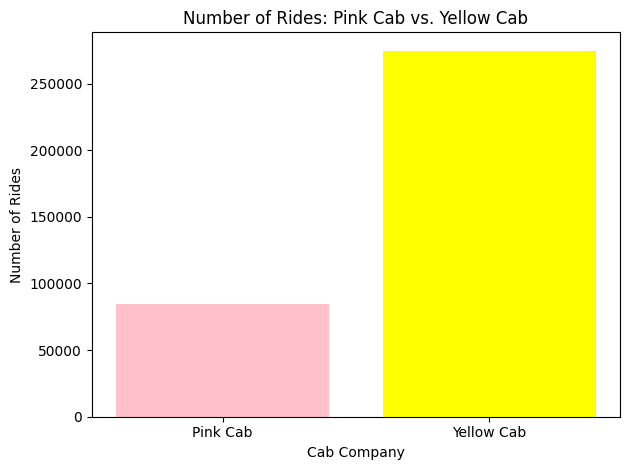

In [13]:
#Visualizing number of rides by Yellow vs Pink company
pink_cab_rides = df[df['Company'] == 'Pink Cab']['Transaction ID'].count()
yellow_cab_rides = df[df['Company'] == 'Yellow Cab']['Transaction ID'].count()

rides = [pink_cab_rides, yellow_cab_rides]
cab_companies = ['Pink Cab', 'Yellow Cab']

plt.bar(cab_companies, rides, color=['pink', 'yellow'])


plt.xlabel('Cab Company')
plt.ylabel('Number of Rides')
plt.title('Number of Rides: Pink Cab vs. Yellow Cab')


plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
from scipy.stats import ttest_ind

#Calculating profits of the two cab companies by subtracting price charged (revenue) from cost of trip (expense)
pink_cab_profits = df[df['Company'] == 'Pink Cab']['Price Charged'] - df[df['Company'] == 'Pink Cab']['Cost of Trip']
yellow_cab_profits = df[df['Company'] == 'Yellow Cab']['Price Charged'] - df[df['Company'] == 'Yellow Cab']['Cost of Trip']


In [15]:
#Performing T-test test to confirm the relationship between profits and cab company
#Hypothesis 1: There is a significant difference in profits between Pink Cab and Yellow Cab
t_statistic, p_value = ttest_ind(pink_cab_profits, yellow_cab_profits, equal_var=False)

print("T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value:.2f}")

#Interpreting the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in profits between Pink Cab and Yellow Cab.")
    if pink_cab_profits.mean() > yellow_cab_profits.mean():
        print("Pink Cab had higher average profits.")
    else:
        print("Yellow Cab had higher average profits.")
else:
    print("Fail to reject the null hypothesis: No significant difference in profits between Pink Cab and Yellow Cab.")

T-Test Results:
T-Statistic: -230.99551452746311
P-value: 0.00
Reject the null hypothesis: There is a significant difference in profits between Pink Cab and Yellow Cab.
Yellow Cab had higher average profits.


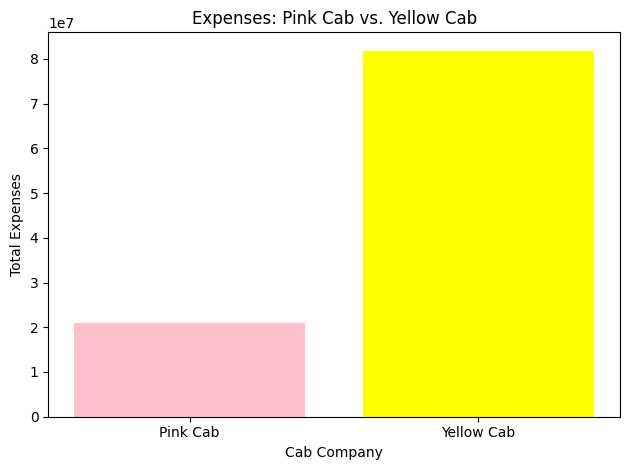

81833514.0192
21020923.009


In [16]:
#Comparing expanses of both cab companies through data visualization
yellow_cab_expenses = df[df['Company'] == 'Yellow Cab']['Cost of Trip'].sum()
pink_cab_expenses = df[df['Company'] == 'Pink Cab']['Cost of Trip'].sum()

expenses = [pink_cab_expenses, yellow_cab_expenses]
cab_companies = ['Pink Cab', 'Yellow Cab']

plt.bar(cab_companies, expenses, color=['pink', 'yellow'])

plt.xlabel('Cab Company')
plt.ylabel('Total Expenses')
plt.title('Expenses: Pink Cab vs. Yellow Cab')

plt.tight_layout()
plt.show()

print(yellow_cab_expenses)
print(pink_cab_expenses)

In [17]:
#Calculating the difference in expenses
expense_difference = yellow_cab_expenses - pink_cab_expenses
totalexpenses = yellow_cab_expenses + pink_cab_expenses
averagetotalexpenses= totalexpenses/2
print(averagetotalexpenses)

#Calculating the percentage difference
percentage_difference = (expense_difference / averagetotalexpenses) * 100

print("Difference in expenses:", expense_difference)
print("Percentage difference", percentage_difference)

51427218.5141
Difference in expenses: 60812591.010199994
Percentage difference 118.24981550096234


In [18]:
#Hypothesis 2: The profits of pink cab will increase after 119% increase in expenses (matching expenses of yellow cab)
from scipy.stats import ttest_rel
pink_cab_data = df[df['Company'] == 'Pink Cab']

#Calculating the increase in expenses (119%)
expense_increase = pink_cab_data['Cost of Trip'] * 1.19

#Predicting Pink Cab profits with increased expenses
predicted_pink_cab_profits = pink_cab_data['Price Charged'] - expense_increase

#Performing paired t-test
t_statistic, p_value = ttest_rel(pink_cab_profits, predicted_pink_cab_profits)

print("Paired t-test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The profits of Pink Cab will increase after 119% increase in expenses.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that profits will increase.")


Paired t-test Results:
T-Statistic: 533.3993527784962
P-value: 0.0
Reject the null hypothesis: The profits of Pink Cab will increase after 119% increase in expenses.


In [19]:
#Compare predicted pink cab profits with current yellow cab profits
print(predicted_pink_cab_profits.sum())
print(yellow_cab_profits.sum())
difference = yellow_cab_profits.sum() - predicted_pink_cab_profits.sum()
print(difference)

1313352.9492900013
44020373.17080001
42707020.22151001


In [69]:
#importing dataset 2  and preprocessing
df2=pd.read_csv("Customer_ID.csv")
df2.dropna(inplace=True)
df2.drop_duplicates(keep=False, inplace=True)
df2.describe

<bound method NDFrame.describe of        Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]>

In [21]:
df2.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [22]:
df2.corr()

<ipython-input-22-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Customer ID,Age,Income (USD/Month)
Customer ID,1.000000,-0.006749,-0.006911
Age,-0.006749,1.000000,0.000156
Income (USD/Month),-0.006911,0.000156,1.000000


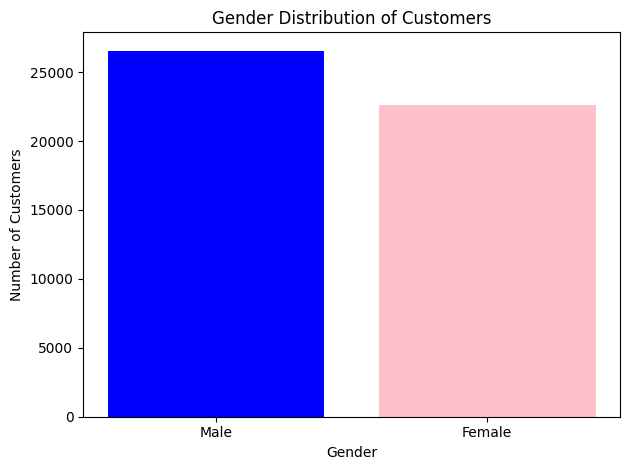

In [23]:
#Comparing gender distribution of customers
gender_counts = df2['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts, color=['blue', 'pink'])

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution of Customers')

plt.tight_layout()
plt.show()

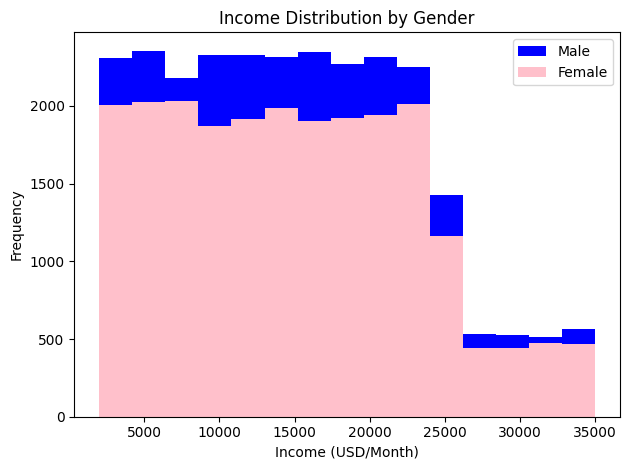

In [24]:
#Viewing gender impact on customers' income level
male_income = df2[df2['Gender'] == 'Male']['Income (USD/Month)']
female_income = df2[df2['Gender'] == 'Female']['Income (USD/Month)']

#Histogram
plt.hist(male_income, bins=15, alpha=1, color='blue', label='Male')
plt.hist(female_income, bins=15, alpha=1, color='pink', label='Female')

plt.xlabel('Income (USD/Month)')
plt.ylabel('Frequency')
plt.title('Income Distribution by Gender')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
#Testing the significance of this variance through T-test
#Hypothesis 3: Gender will have a significant impact on income
from scipy.stats import ttest_ind
#Separating the income data based on gender
male_income = df2[df2['Gender'] == 'Male']['Income (USD/Month)']
female_income = df2[df2['Gender'] == 'Female']['Income (USD/Month)']

t_statistic, p_value = ttest_ind(male_income, female_income)

print("T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Gender significantly affects income.")
else:
    print("Fail to reject the null hypothesis: No significant effect of gender on income.")

T-Test Results:
T-Statistic: 0.7557972721208138
P-value: 0.44977437321752045
Fail to reject the null hypothesis: No significant effect of gender on income.


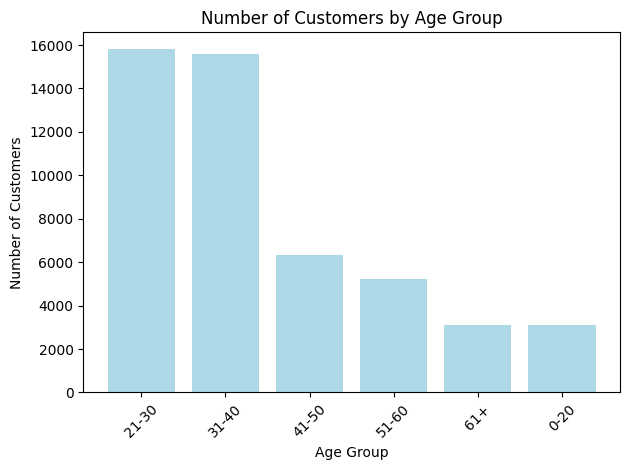

In [26]:
#Viewing number of customers in different age groups
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

df2['Age Group'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = df2['Age Group'].value_counts()

plt.bar(age_group_counts.index, age_group_counts, color='lightblue')

plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

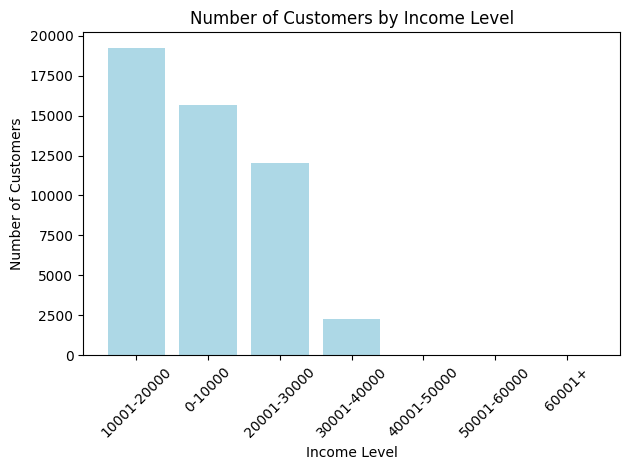

In [27]:
#Viewing number of customers across different income levels
income_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, float('inf')]
income_labels = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000', '50001-60000', '60001+']

df2['Income Level'] = pd.cut(df2['Income (USD/Month)'], bins=income_bins, labels=income_labels, right=False)

income_level_counts = df2['Income Level'].value_counts()

plt.bar(income_level_counts.index, income_level_counts, color='lightblue')

plt.xlabel('Income Level')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Income Level')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

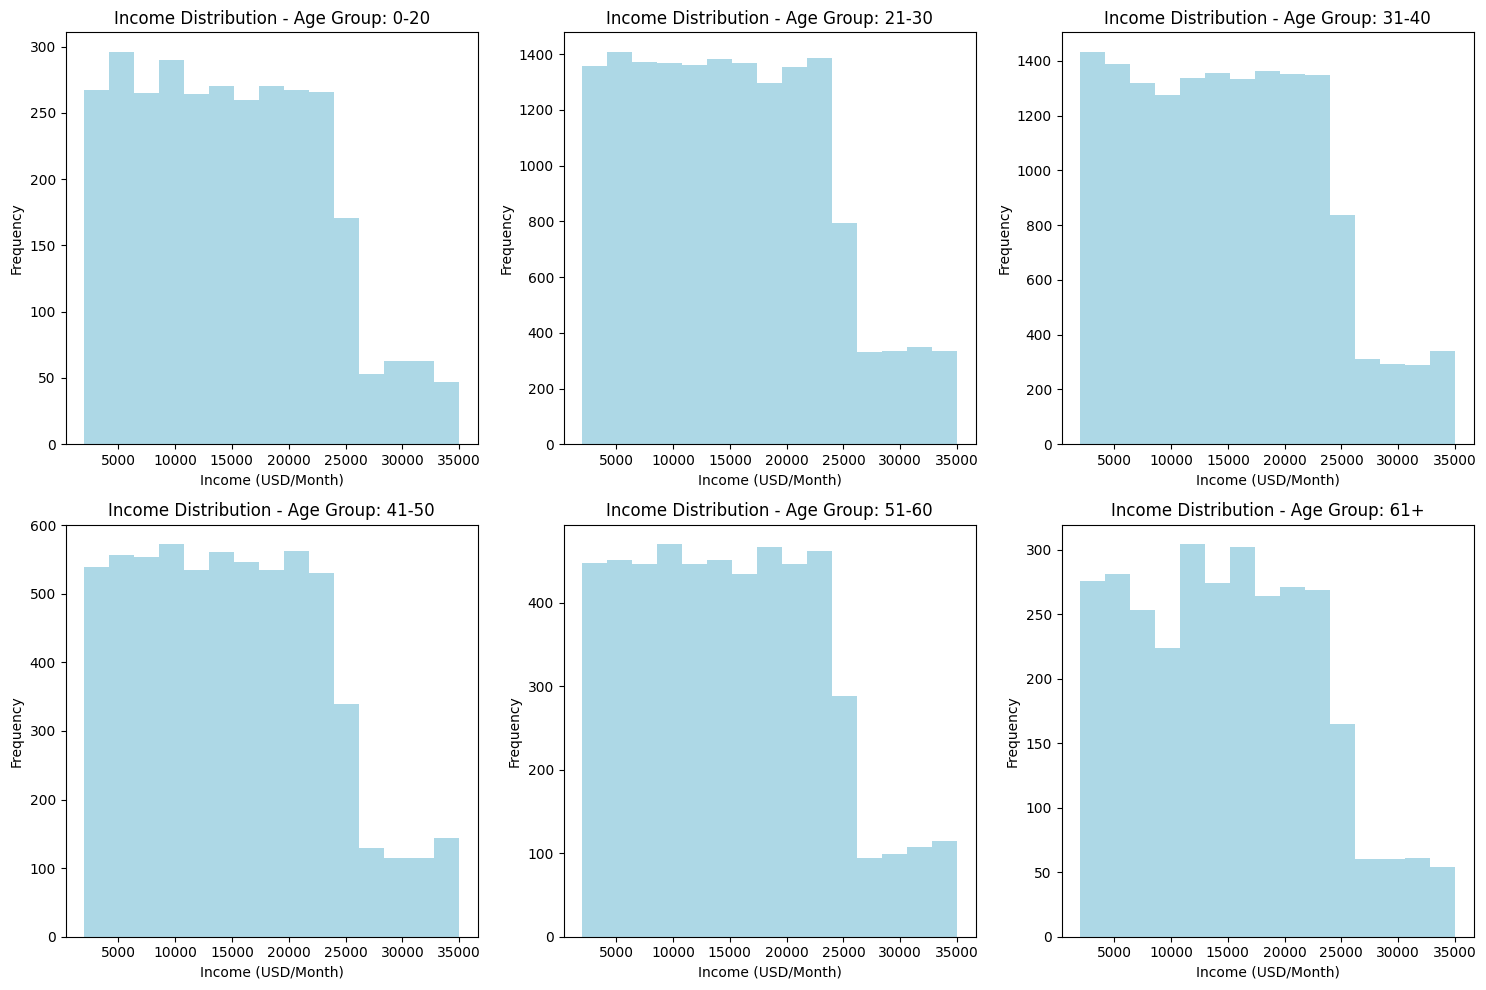

In [28]:
#Viewing age groups of customers across different income levels
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

df2['Age Group'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels, right=False)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, age_group in enumerate(age_labels):
    ax = axes[i]
    age_group_data = df2[df2['Age Group'] == age_group]['Income (USD/Month)']
    ax.hist(age_group_data, bins=15, color='lightblue')
    ax.set_title(f'Income Distribution - Age Group: {age_group}')
    ax.set_xlabel('Income (USD/Month)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
#Hypothesis 4: Age of customers will have a significant impact on income level
import scipy.stats as stats
anova_results = stats.f_oneway(*[group['Income (USD/Month)'] for name, group in df2.groupby('Age Group')])

# Print the ANOVA results
print("ANOVA Results:")
print(f"F-statistic: {anova_results.statistic}")
print(f"P-value: {anova_results.pvalue}")

# Interpret the results
alpha = 0.05
if anova_results.pvalue < alpha:
    print("Reject the null hypothesis: Age has a significant impact on income level.")
else:
    print("Fail to reject the null hypothesis: No significant impact of age on income level.")

ANOVA Results:
F-statistic: 0.595463697918255
P-value: 0.7034827226856755
Fail to reject the null hypothesis: No significant impact of age on income level.


In [70]:
#importing dataset 3  and preprocessing
df3=pd.read_csv("City.csv")
df3.dropna(inplace=True)
df3.drop_duplicates(keep=False, inplace=True)
df3.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [31]:
df3.rename(columns={'City': 'City of Customer'}, inplace=True)
df3.head()

,City of Customer,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [72]:
df4=pd.read_csv("combined.csv")
df4.head()

<ipython-input-72-41348a237623>:1: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df4=pd.read_csv("combined.csv")


,Transaction ID,Date of Travel,Company,City of Cab,KM Travelled,Price Charged,Cost of Trip,City of Customer,Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,NEW YORK NY,"8,405,837","302,149"
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,CHICAGO IL,"1,955,130","164,468"
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,LOS ANGELES CA,"1,595,037","144,132"
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,MIAMI FL,"1,339,155","17,675"
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,SILICON VALLEY,"1,177,609","27,247"


In [33]:
#Testing performance (profits) across cities
#Hypothesis 5: There is a significant difference in profitability across different cities
df4['Profit'] = df4['Price Charged'] - df4['Cost of Trip']

#ANOVA
anova_results = stats.f_oneway(*[group['Profit'] for name, group in df4.groupby('City of Cab')])

print("ANOVA Results:")
print(f"F-statistic: {anova_results.statistic}")
print(f"P-value: {anova_results.pvalue:.2f}")

alpha = 0.05
if anova_results.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in profitability across different cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in profitability across different cities.")

ANOVA Results:
F-statistic: 9528.597969224551
P-value: 0.00
Reject the null hypothesis: There is a significant difference in profitability across different cities.


In [34]:
#Finding the city with the highest mean profits
city_mean_profits = df4.groupby('City of Cab')['Profit'].mean()
most_profitable_city = city_mean_profits.idxmax()
max_mean_profit = city_mean_profits.max()
print("The most profitable city is", most_profitable_city, "with a mean profit of", max_mean_profit)

The most profitable city is NEW YORK NY with a mean profit of 279.94749120688795


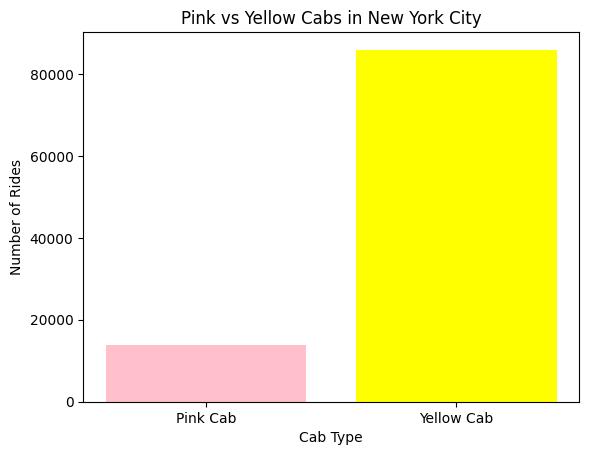

In [35]:
nyc_data = df4[df4['City of Cab'] == 'NEW YORK NY']

#Calculating value counts of Pink and Yellow cabs
pink_counts = nyc_data[nyc_data['Company'] == 'Pink Cab']['Company'].count()
yellow_counts = nyc_data[nyc_data['Company'] == 'Yellow Cab']['Company'].count()

#Bar plot
cab_types = ['Pink Cab', 'Yellow Cab']
cab_counts = [pink_counts, yellow_counts]

plt.bar(cab_types, cab_counts, color=['pink', 'yellow'])
plt.xlabel('Cab Type')
plt.ylabel('Number of Rides')
plt.title('Pink vs Yellow Cabs in New York City')
plt.show()

In [36]:
#Confirming that the difference in market share between Pink and Yellow Cab is significant
#through proportions z test
#Hypothesis 6: The difference in market share between Pink and Yellow Cab is significant
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
pink_total_rides = df4[df4['Company'] == 'Pink Cab'].shape[0]
yellow_total_rides = df4[df4['Company'] == 'Yellow Cab'].shape[0]

# Calculate the total number of rides in the dataset
total_rides = df4.shape[0]

# Perform two-sample proportion hypothesis test
successes = [pink_total_rides, yellow_total_rides]
nobs = [total_rides, total_rides]
z_stat, p_value = proportions_ztest(successes, nobs, alternative='two-sided')

# Print the results of the hypothesis test
print("Two-Sample Proportion Test Results:")
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in market share between Pink Cab and Yellow Cab.")
else:
    print("Fail to reject the null hypothesis: No significant difference in market share between Pink Cab and Yellow Cab.")

Two-Sample Proportion Test Results:
Z-statistic: -448.14217516061643
P-value: 0.0
Reject the null hypothesis: There is a significant difference in market share between Pink Cab and Yellow Cab.


In [44]:
#Checking which company has the highest profits during Christmas season
df4['Date of Travel'] = pd.to_datetime(df4['Date of Travel'])

# Define the Christmas period (December 25th)
start_date = pd.Timestamp("2016-12-25")
end_date = pd.Timestamp("2016-12-25")

# Filter the dataset based on the Christmas period
filtered_df = df4[(df4['Date of Travel'] >= start_date) & (df4['Date of Travel'] <= end_date)]

# Group the data by "Company" and sum the "Profit" column
company_profit_sums = filtered_df.groupby('Company')['Profit'].sum()

# Find the company with the maximum profit during Christmas
max_profit_company = company_profit_sums.idxmax()
max_profit = company_profit_sums.max()

print(f"The company with the maximum profit during Christmas is {max_profit_company} with a profit of ${max_profit:.2f}.")

The company with the maximum profit during Christmas is Yellow Cab with a profit of $104240.48.


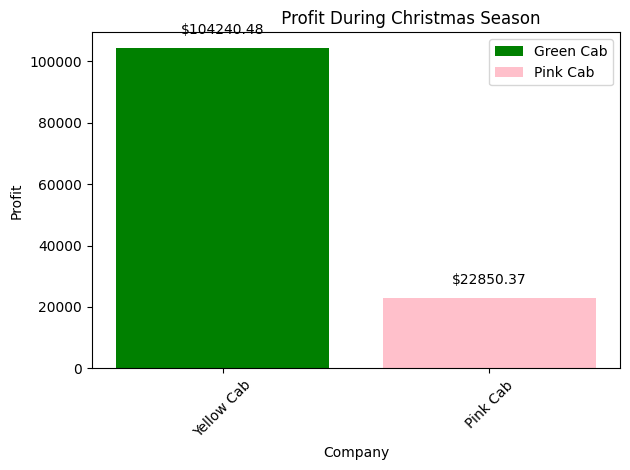

In [48]:
pink_cab_profit = filtered_df[filtered_df['Company'] == 'Pink Cab']['Profit'].sum()

# Create a bar plot
plt.bar(max_profit_company, max_profit, color='green', label='Green Cab')
plt.bar('Pink Cab', pink_cab_profit, color='pink', label='Pink Cab')
plt.xlabel('Company')
plt.ylabel('Profit')
plt.title('                     Profit During Christmas Season')
plt.xticks(rotation=45)

# Annotate the bars with the profit values
plt.annotate(f"${max_profit:.2f}", (max_profit_company, max_profit), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f"${pink_cab_profit:.2f}", ('Pink Cab', pink_cab_profit), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.tight_layout()
plt.show()


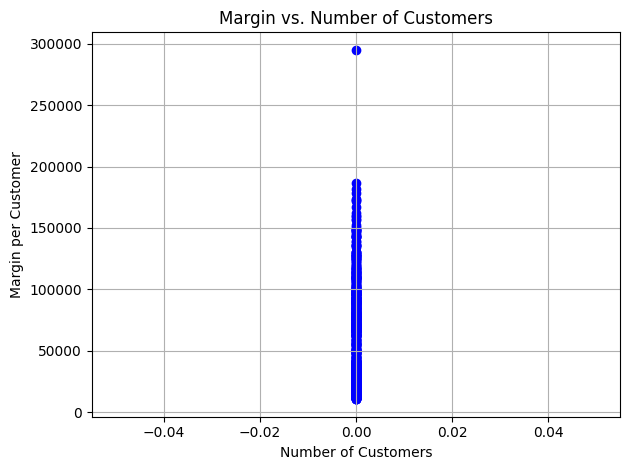

In [51]:
#Checking if margin increases proportionally with number of customers
start_date = pd.Timestamp("2016-01-31")
end_date = pd.Timestamp("2018-12-31")

# Filter the dataset based on the time period
filtered_m = df4[(df4['Date of Travel'] >= start_date) & (df4['Date of Travel'] <= end_date)]

# Calculate the profit and number of customers for each time period
time_periods = filtered_m.groupby('Date of Travel').agg({
    'Profit': 'sum',
    'Users': 'sum'
}).reset_index()

# Calculate margin per customer
time_periods['Margin per Customer'] = time_periods['Profit'] / time_periods['Users'].replace(0, 1)

# Create a scatter plot
plt.scatter(time_periods['Users'], time_periods['Margin per Customer'], color='blue')
plt.xlabel('Number of Customers')
plt.ylabel('Margin per Customer')
plt.title('Margin vs. Number of Customers')
plt.grid()

plt.tight_layout()
plt.show()

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-57-085ecc7de12a>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_attributes = df2.groupby('Cluster').mean()


Cluster 0 attributes:
Customer ID           28730.901921
Age                      30.126972
Income (USD/Month)    14972.385067
Name: 0, dtype: float64


Cluster 1 attributes:
Customer ID           28359.882862
Age                      30.449260
Income (USD/Month)     8679.262652
Name: 1, dtype: float64


Cluster 2 attributes:
Customer ID           28060.138646
Age                      56.339030
Income (USD/Month)    14792.127644
Name: 2, dtype: float64


Cluster 3 attributes:
Customer ID           28162.462339
Age                      30.946381
Income (USD/Month)    22490.430816
Name: 3, dtype: float64




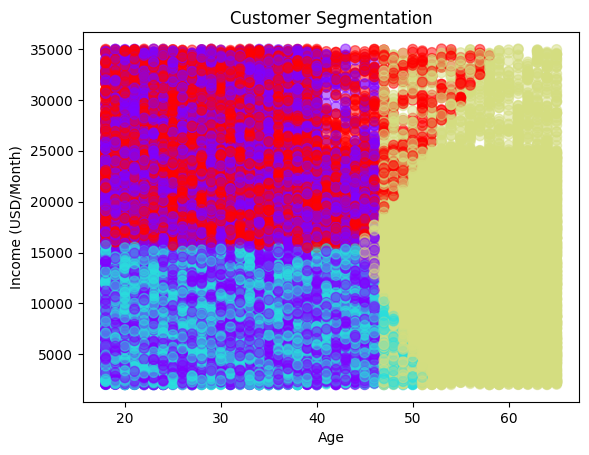

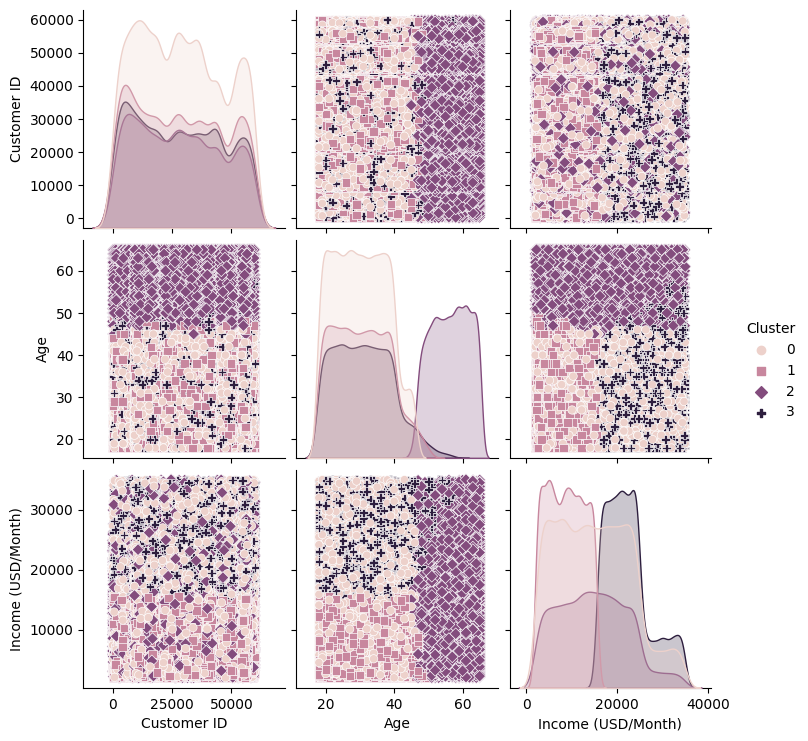

In [57]:
#Visualizing attributes of customer segments
attributes = ['Gender', 'Age', 'Income (USD/Month)']  # Add more attributes if needed

# Prepare data for clustering
data = df2[attributes]

#One hot encoding
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (you can adjust this based on your analysis)
num_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
df2['Cluster'] = clusters

# Analyze attributes of different clusters
cluster_attributes = df2.groupby('Cluster').mean()

# Print the attributes of each cluster
for cluster_id, attributes in cluster_attributes.iterrows():
    print(f"Cluster {cluster_id} attributes:")
    print(attributes)
    print("\n")

# Visualize the clusters (e.g., for Age and Income)
#plt.scatter(df2['Age'], df2['Income (USD/Month)'], c=clusters, cmap='rainbow')
#.xlabel('Age')
#plt.ylabel('Income (USD/Month)')
#plt.title('Customer Segmentation')
#plt.show()

plt.scatter(df2['Age'], df2['Income (USD/Month)'], c=clusters, cmap='rainbow', alpha=0.5, s=50)
plt.xlabel('Age')
plt.ylabel('Income (USD/Month)')
plt.title('Customer Segmentation')
plt.show()

# Visualize pairwise relationships using pair plot
sns.pairplot(df2, hue='Cluster', diag_kind='kde', markers=["o", "s", "D", "P"])
plt.show()

#Hypothesis Results and Recommendations

It is recommended to invest in yellow cab due to analysis based on the following points:

**1.** **Profits:** There is a significant difference in profits between Pink Cab and Yellow Cab. Yellow Cab has higher average profits.

**2. Cost and Profit Prediction:** Although the pink cost had 119% less expenses than the Yellow Cab, increasing the expenses and forecasting the increase in profits after equal expenses still revealed they would be lower than Yellow Cab’s current profits by $42707020.

**3. City-wise Profits and Distribution:**There is a significant difference in profitability across different cities, with New York City having the highest profits for all cabs. There are more Yellow Cabs than Pink Cabs in New York City, increasing their likelihood for further profits.

**4. Market Share:** There is a significant difference in market share between Pink Cab and Yellow Cab, with Yellow Cab having a noticeably higher share of the total rides. This difference suggests that Yellow Cab has a stronger presence in the market compared to Pink Cab.

**5. Seasonal Profits:** The company with the maximum profit during Christmas is Yellow Cab with a profit of $104240.48, notably higher than the Pink Cab.

In conclusion, the analysis of various aspects of the cab industry leads to the confident recommendation of investing in Yellow Cab.
